# Proyek Data - Analisis Saham Bagian 1

Kita akan coba menjawab pertanyaan berikut :
1. Apa yang merubah pada harga dari saham setiap waktu?
2. Seperti apa rata rata pengembalian harian dari saham?
3. Apakah rata rata pergerakan dari berbagai saham?
4. Apakah hubungan antara perbedaan harga akhir saham?
4. Apakah hubungan antara perbedaan pengembalian harian saham?
5. Berapa banyak resiko nilai yang yang kita masukkan dengan berinvestasi 
pada saham tertentu?
6. Bagaimana kita dapat mencoba untuk menebak pergerakan harga saham di masa 
depan?

In [1]:
#Kita import terlebih dahulu
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Kita import juga berupa matplotlib, seaborn, set style sns, dan inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#KIta juga membutuhkan datareader
from pandas_datareader import DataReader

#Kita juga membutuhkan datetime
from datetime import datetime

#Oke kali ini kita membutuhkan method dari versi yang terbaru yaitu division
from __future__ import division


In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()

start =datetime(end.year - 1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-11,171.210007,169.250000,171.050003,169.429993,20993400.0,167.240967
2019-02-12,171.000000,169.699997,170.100006,170.889999,22283500.0,168.682114
2019-02-13,172.479996,169.919998,171.389999,170.179993,22490200.0,167.981277
2019-02-14,171.259995,169.380005,169.710007,170.800003,21835700.0,168.593292
2019-02-15,171.699997,169.750000,171.250000,170.419998,24626800.0,168.218201
2019-02-19,171.440002,169.490005,169.710007,170.929993,18972800.0,168.721588
2019-02-20,173.320007,170.990005,171.190002,172.029999,26114400.0,169.807388
2019-02-21,172.369995,170.300003,171.800003,171.059998,17249700.0,168.849930
2019-02-22,173.000000,171.380005,171.580002,172.970001,18913200.0,170.735229


In [6]:
GOOG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-05,1463.839966,1430.560059,1462.420044,1448.229980,1986200,1448.229980
2020-02-06,1482.000000,1449.569946,1450.329956,1476.229980,1679400,1476.229980
2020-02-07,1485.839966,1466.349976,1467.300049,1479.229980,1172300,1479.229980
2020-02-10,1509.500000,1474.319946,1474.319946,1508.680054,1418900,1508.680054
2020-02-11,1529.630005,1505.637817,1511.810059,1508.790039,1344633,1508.790039


In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,226.989605,223.175739,224.879051,225.300672,2.766495e+07,223.790734
std,43.263449,42.630119,42.890549,43.149023,9.736417e+06,43.690351
min,171.000000,169.250000,169.710007,169.429993,1.136200e+07,167.240967
25%,197.690002,193.600006,195.410004,195.570007,2.099050e+07,193.161682
50%,209.320007,206.740005,208.389999,208.479996,2.588620e+07,206.447800
75%,260.350006,256.850006,258.309998,259.450012,3.201060e+07,258.835724
max,327.850006,321.380005,324.450012,325.209991,6.928140e+07,324.440002


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-02-11 to 2020-02-11
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


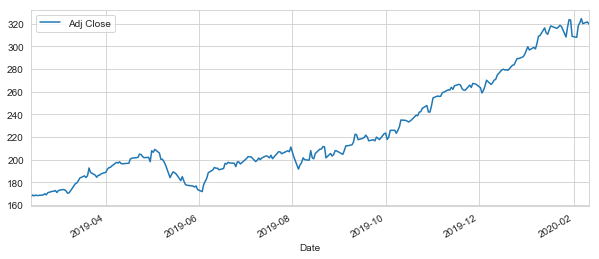

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

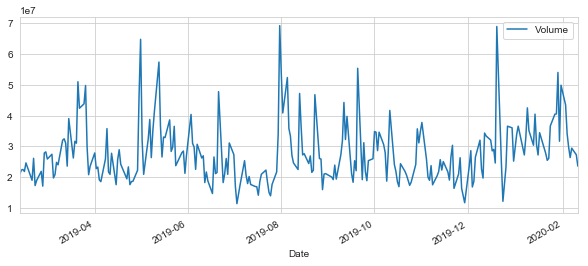

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
url = 'http://www.investopedia.com/terms/m/movingaverage.asphttp://www.investopedia.com/terms/m/movingaverage.asp'
url = 'http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp'

# Proyek Data - Analisis Saham Bagian 2

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

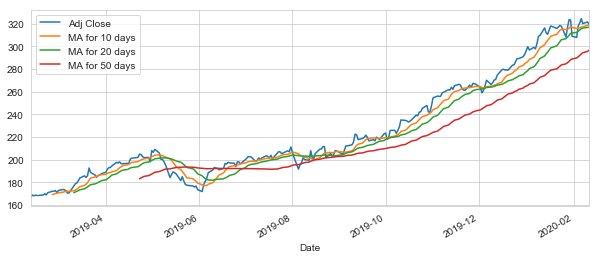

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

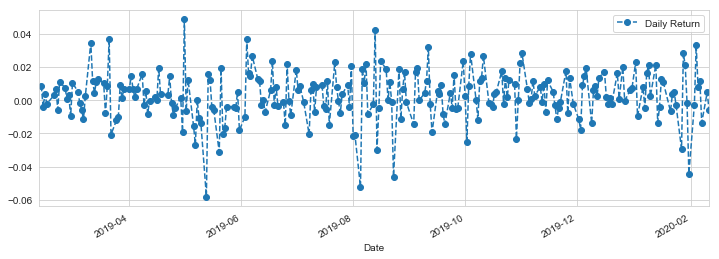

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

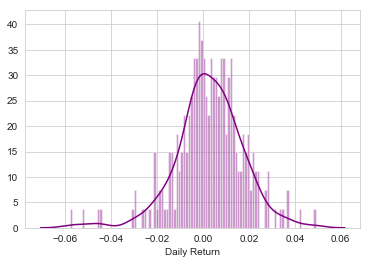

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

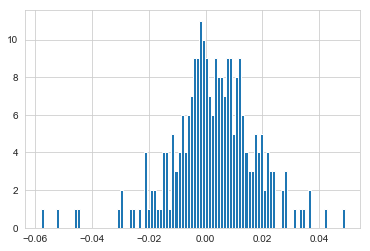

In [16]:
AAPL['Daily Return'].hist(bins=100)

In [17]:
penutup_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [18]:
penutup_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-11,167.240967,1591.000000,1095.010010,103.716446
2019-02-12,168.682114,1638.010010,1121.369995,105.332550
2019-02-13,167.981277,1640.000000,1120.160034,105.253716
2019-02-14,168.593292,1622.650024,1121.670044,105.342407
2019-02-15,168.218201,1607.949951,1113.650024,106.643166


In [19]:
kembalian = penutup_df.pct_change()

In [20]:
kembalian.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-11,NaN,NaN,NaN,NaN
2019-02-12,0.008617,0.029547,0.024073,0.015582
2019-02-13,-0.004155,0.001215,-0.001079,-0.000748
2019-02-14,0.003643,-0.010579,0.001348,0.000843
2019-02-15,-0.002225,-0.009059,-0.007150,0.012348


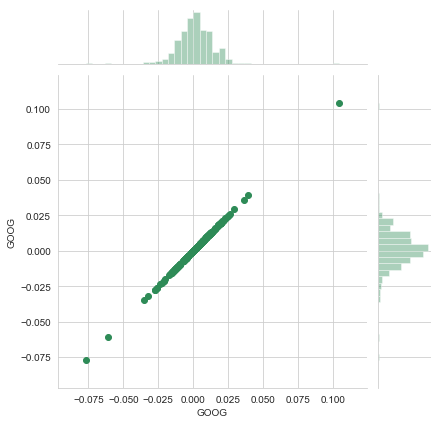

In [21]:
sns.jointplot('GOOG','GOOG',kembalian,kind='scatter',color='seagreen')

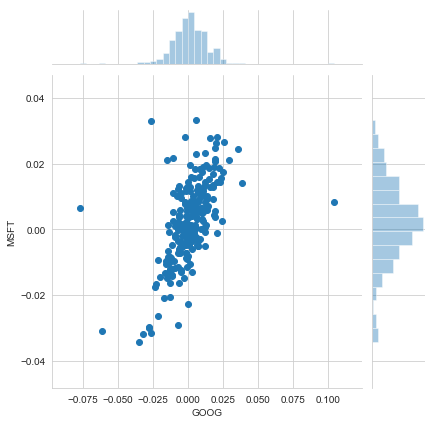

In [22]:
sns.jointplot('GOOG','MSFT',kembalian,kind='scatter')

In [23]:
url = 'https://en.wikipedia.org/wiki/Pearson_correlation_coefficient'

# Proyek Data - Analisis Saham Bagian 3

In [24]:
kembalian.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-11,NaN,NaN,NaN,NaN
2019-02-12,0.008617,0.029547,0.024073,0.015582
2019-02-13,-0.004155,0.001215,-0.001079,-0.000748
2019-02-14,0.003643,-0.010579,0.001348,0.000843
2019-02-15,-0.002225,-0.009059,-0.007150,0.012348


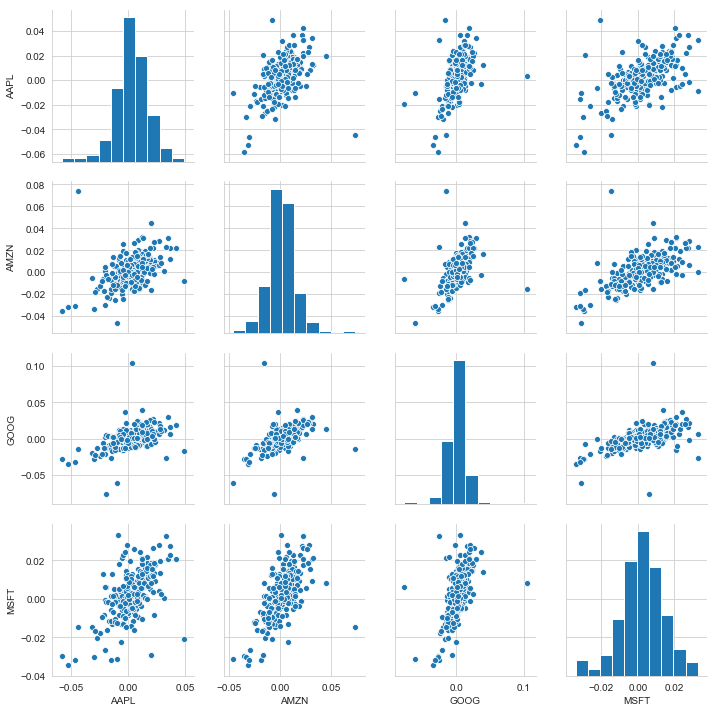

In [25]:
sns.pairplot(kembalian.dropna())

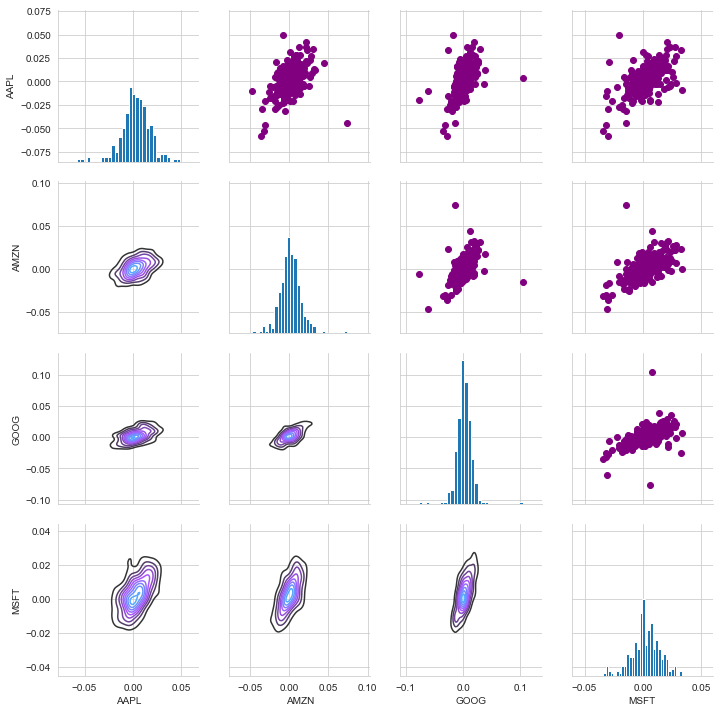

In [26]:
hasil_fig = sns.PairGrid(kembalian.dropna())

hasil_fig.map_upper(plt.scatter,color='purple')

hasil_fig.map_lower(sns.kdeplot,cmap='cool_d')

hasil_fig.map_diag(plt.hist,bins=30)

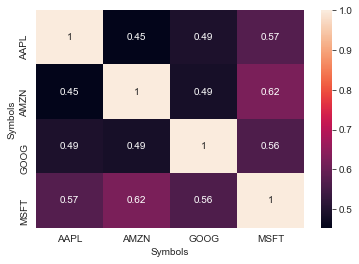

In [27]:
corr = kembalian.dropna().corr()

sns.heatmap(corr, annot=True)

# Proyek Data - Analisis Saham Bagian 4

In [29]:
rets = kembalian.dropna()

In [30]:
url = 'https://matplotlib.org/tutorials/text/annotations.html#annotating-with-text-with-box'

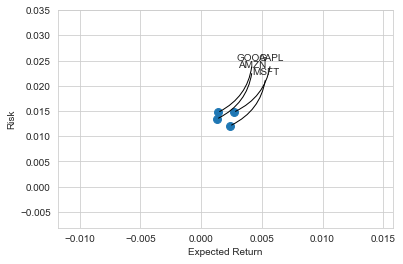

In [33]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50,50),
    textcoords = 'offset points', ha= 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3, rad=-0.3', color = 'black'))

# Proyek Data - Analisis Saham Bagian 5

In [34]:
url = 'https://en.wikipedia.org/wiki/Quantile'

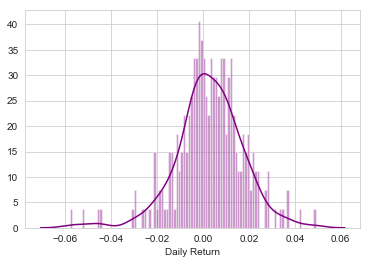

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [36]:
rets['AAPL'].quantile(0.05)

-0.02065639802809531

In [37]:
url = 'http://www.investopedia.com/articles/07/montecarlo.asp'

In [38]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [43]:
def stock_monte_carlo(start_price, days,mu,sigma):
    
    price = np.zeros(days)
    price[0] =start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        
        drift[x] = mu *dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
                                 
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

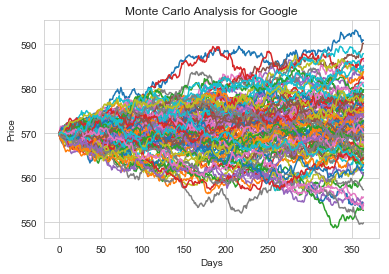

In [44]:
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')

In [45]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [46]:
url = 'http://en.wikipedia.org/wiki/Quantile'

Text(0.5,1,u'Final price distribution for Google Stock after 365 days')

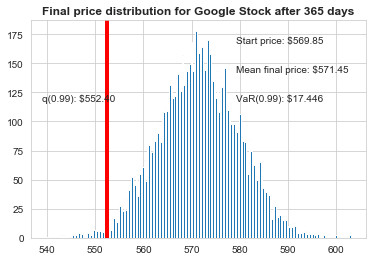

In [48]:
q = np.percentile(simulations, 1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.3f" % (start_price - q,))

plt.figtext(0.15, 0.60, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')